In [15]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv('data_anis.csv')
df2 = pd.read_csv('data_anisNeg.csv')

df = [df1, df2]
df = pd.concat(df, ignore_index=True)
df

# Display the DataFrame
data = df[['full_text','sentimen']]
data

,full_text,sentimen
0,@ekowboy2 . Ambil Bansosnya Pilihannya tetap ...,positif
1,@alisyarief @PDemokrat Yg melekat di masyaraka...,NaN
2,@Dahnilanzar @prabowo @gibran_tweet padahal @F...,negatif
3,@Utiah_Mak Aamiin alhamdulillah Smg hasil ini ...,positif
4,Ratusan Personel Gabungan Disiapkan Amankan Ka...,positif
...,...,...
1472,Faktanya CUPU sok SUHU.. #anakpresiden #Ganja...,negatif
1473,@cagubnyinyir2 @BoyMantouw @mas_alku @wonggend...,negatif
1474,@Andi54582715 @Omnya_Gibran @jokowi Memang Klo...,negatif
1475,Jelaskan Jangan Membodohi Rakyat dan Pengamat ...,negatif


### Bersihkan Data

In [17]:
# melihat dan Hapus data yang kosong
data.isnull().sum()

full_text      1
sentimen     167
dtype: int64

In [18]:
data = data.dropna()
data.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [19]:
# melihat data yang duplicate dan menghapusnya
data.duplicated().sum()

10

In [20]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [21]:
data.shape

(1299, 2)

In [22]:
data

,full_text,sentimen
0,@ekowboy2 . Ambil Bansosnya Pilihannya tetap ...,positif
2,@Dahnilanzar @prabowo @gibran_tweet padahal @F...,negatif
3,@Utiah_Mak Aamiin alhamdulillah Smg hasil ini ...,positif
4,Ratusan Personel Gabungan Disiapkan Amankan Ka...,positif
5,Amin = Asal jangan Anis Muhaimin ??????,negatif
...,...,...
1472,Faktanya CUPU sok SUHU.. #anakpresiden #Ganja...,negatif
1473,@cagubnyinyir2 @BoyMantouw @mas_alku @wonggend...,negatif
1474,@Andi54582715 @Omnya_Gibran @jokowi Memang Klo...,negatif
1475,Jelaskan Jangan Membodohi Rakyat dan Pengamat ...,negatif


In [23]:
# fungsi menghapus karakter khusus
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

data['full_text'] = data['full_text'].apply(clean_twitter_text)

In [24]:
# melihat data yang sama lagi
data.duplicated().sum()

72

In [25]:
data = data.drop_duplicates()

In [26]:
data.duplicated().sum()

0

In [27]:
data

,full_text,sentimen
0,Ambil Bansosnya Pilihannya tetap No1 AMIN ANIS...,positif
2,padahal bilang AnisMuhaimin bakal jadi tersang...,negatif
3,Aamiin alhamdulillah Smg hasil ini sama hasily...,positif
4,Ratusan Personel Gabungan Disiapkan Amankan Ka...,positif
5,Amin Asal jangan Anis Muhaimin,negatif
...,...,...
1472,Faktanya CUPU sok SUHU,negatif
1473,Terpaksa kayanya Harus nurut sama emak,negatif
1474,Memang Klo pengkianat itu sekali melakukan unt...,negatif
1475,Jelaskan Jangan Membodohi Rakyat dan Pengamat ...,negatif


# Preprocessing Text

### 1. Case Folding

In [28]:
# Mengubah kata Huruf besar menjadi huruf kecil
data['full_text'] = data['full_text'].str.lower()
data

C:\Users\PC\AppData\Local\Temp\ipykernel_22276\2108421011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['full_text'] = data['full_text'].str.lower()


,full_text,sentimen
0,ambil bansosnya pilihannya tetap no1 amin anis...,positif
2,padahal bilang anismuhaimin bakal jadi tersang...,negatif
3,aamiin alhamdulillah smg hasil ini sama hasily...,positif
4,ratusan personel gabungan disiapkan amankan ka...,positif
5,amin asal jangan anis muhaimin,negatif
...,...,...
1472,faktanya cupu sok suhu,negatif
1473,terpaksa kayanya harus nurut sama emak,negatif
1474,memang klo pengkianat itu sekali melakukan unt...,negatif
1475,jelaskan jangan membodohi rakyat dan pengamat ...,negatif


In [29]:
data.shape

(1227, 2)

### 2. Stopword

In [30]:
# Menghilangkan kata-kata yang tidak memilki bobot
import Sastrawi 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_word)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

data['full_text'] = data['full_text'].apply(lambda x: stopword(x))
data

C:\Users\PC\AppData\Local\Temp\ipykernel_22276\2074306166.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['full_text'] = data['full_text'].apply(lambda x: stopword(x))


,full_text,sentimen
0,ambil bansosnya pilihannya tetap no1 amin anis...,positif
2,padahal bilang anismuhaimin bakal jadi tersang...,negatif
3,aamiin alhamdulillah smg hasil sama hasily nnt...,positif
4,ratusan personel gabungan disiapkan amankan ka...,positif
5,amin asal jangan anis muhaimin,negatif
...,...,...
1472,faktanya cupu sok suhu,negatif
1473,terpaksa kayanya nurut sama emak,negatif
1474,memang klo pengkianat sekali melakukan selamax...,negatif
1475,jelaskan jangan membodohi rakyat pengamat yg l...,negatif


### 3. Normalisasi

In [31]:
# Mengubah kata singkat menjadi normal
norm = {'sy':'saya','tau':'tahu','perubahancoblos':'perubahan coblos','utk':'untuk',
        'yg':'yang','org':'orang','pd':'pada','ganjar':'','mahfud':'','prabowo':'',
        'gibran':'','anis':'','muhaimin':'','trus':'terus','tkut':'takut','amin':'',
        'yang':'','pak':''}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

data['full_text'] = data['full_text'].apply(lambda x:normalisasi(x))
data

C:\Users\PC\AppData\Local\Temp\ipykernel_22276\4181111405.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['full_text'] = data['full_text'].apply(lambda x:normalisasi(x))


,full_text,sentimen
0,ambil bansosnya pilihannya tetap no1,positif
2,padahal bilang bakal jadi tersangka eeaaaa b...,negatif
3,aamiin alhamdulillah smg hasil sama hasily nnt...,positif
4,ratusan personel gabungan disiapkan amankan ka...,positif
5,asal jangan,negatif
...,...,...
1472,faktanya cupu sok suhu,negatif
1473,tersa kayanya nurut sama emak,negatif
1474,memang klo pengkianat sekali melakukan selamax...,negatif
1475,jelaskan jangan membodohi rakyat pengamat lug...,negatif


### 4. Tokenizing

In [32]:
# Memisahkan kata dalam suatu kalimat
tokenized = data['full_text'].apply(lambda x:x.split())
tokenized

0              [ambil, bansosnya, pilihannya, tetap, no1]
2       [padahal, bilang, bakal, jadi, tersangka, eeaa...
3       [aamiin, alhamdulillah, smg, hasil, sama, hasi...
4       [ratusan, personel, gabungan, disiapkan, amank...
5                                          [asal, jangan]
                              ...                        
1472                          [faktanya, cupu, sok, suhu]
1473                  [tersa, kayanya, nurut, sama, emak]
1474    [memang, klo, pengkianat, sekali, melakukan, s...
1475    [jelaskan, jangan, membodohi, rakyat, pengamat...
1476    [terbaik, nyulik, kangkangi, mk, disetir, ibu,...
Name: full_text, Length: 1227, dtype: object

### 5. Stemming

In [33]:
# Mengubah kata imbuhan menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

ambil bansosnya pilih tetap no1
padahal bilang bakal jadi sangka eeaaaa bener mana nih bos
aamiin alhamdulillah smg hasil sama hasily nnti pada tgl 14 pebruari smg aamiin smg alloh ridho psangn smg alloh takdirkn menang mutlak d propinsi aamiin
ratus personel gabung siap aman kampanye pamekasan polres pamekasan siap ratus personel gabung rangka aman kampanye akbar baswedan via
asal jangan
saya pilih no 1
serta juta rakyat indonesia tidak pernah survei lembaga survey pilih caprescawapres no 1 baswedan
salam ubah akal sehat orang cerdas waras pilih
baswedan iskandar presiden 20242029
kocak fahri hamzah baswedan iskandar bakal jadi sangka pilpres
tanggal 14 kita coblos no 1 aamiin insayaa allah barokah
allah jadi pasang jd presiden 2024 2029ini doa saya panjat tiap sholat saya akhir akhir inimudah mudah ijabah allah swt yarobbal al
pokok satu putar biar masayaarakat indonesia tahu siapa presiden bohir belakang menang
dari perwiritan emak2 dukung ba ba jadi presiden wakil presiden ri salam

cuplik video lihat saat orang2 tuluz sedang doa untuk amp
aamiinkami bisa mendoakansemoga kampanye akhir allah lancar ada menghalang2ngidan ramai lindung allah aamiin
bingung buat cak imin mending menang ikut arah tum prof join kabinet menteri
sehat selalu dah tokoh2 bangsa dukung perubahandan selalu dalm lindung allah
allohuakbar moga maha kuasa beri sempat baswedan iskandar bagi president wakil presiden akan bawa ubah lebih baik negara indonesian cinta
yok pilih allahh
cari sosok pimpin sidiq amanah tablig fathonahinsayaallah pasang
siap kapten rakyat dukung rasayaid baswedan iskandar presiden ri 2024 menang menang menang
bukan dukung selesai doa selalu ucap aamiin mmg apa masalah bagi ptg pilih
menang si
dengan ratus juta rakyat indonesia tidak pernah survei lembaga survei pilih
keren si abah indonesia emas tang
tang tepat tahun 2024 indonesia jadi negara emas gasss
mashallah 01 inshallah rb presiden ri 2024 iskandar cawapres nya
pokok bilang pasang kalah tidak guna dukung pasang sa

tentu wakanda nomor 1 donk amp abah cak imin
tuju ubah lebih baik sama 2024
moga calon presiden amp beri kuat sabar hadap tantang hadap lama masa kampanye pimpin
moga allah meridhoi baswedan iskandar pimpin negeri dengan adil amanah
negara di urus azas adil tuju ubah amiinn yra
pasang tuju ubah amiinn yra
pasang tuju ubah amiinn yra
perlu pimpin adil memang wujud untuk masayaarakat bawah garis kemiskinann
laku ubah indonesia
top markotop top dah pokoke
hidup rakyat hidup aja dulu
indonesia butuh ubah indonesia makmur masayaarakat sejahtera
pilih berkah amanah indonesia maju rakyat sejahtera
tuh jelas siapa mulai main sinetron bilang museum di kelola tni si agus ketua tkd yogya mau diskredit tni
hilir industri mah duh gimana bangsa indonesia wes lah in aja ubah indonesia lebih baik sama 01 insayaaallah menang
yakin sama indonesia makin baik baik kan deh
siap tuju ubah indonesia lebih baik menang
gus mantap pasang sangat capres
gus luar biasa
gus mantap indonesia ubah
negara korporasi 20

capres super komplitsaya keluarga rasa hormat pilih ba pimpin negara cinta indonesia
moga 2024 presiden insayaa allah indonesia adil makmur sejahtera
ubah
ntt kirim salam ubah salut sama
pilih capres cawapres amanah baswedan gus iskandar
bangun harus berkeadilanmari sama wujud
adil rakyat di wujudkanbersama yakin bisa
ga masuk putar dua masuk putar dua mafud
insayaaallah cipta makmur memberika lahan perintah masayaarakat cocok tansayaaallah kabul
babat hutan tampa rencana sama aja bunuh masa depan iskandar rubah bijak pihak rakyat
baswedan gus calon presiden depan penting rakayat makmur rakyat 2024
adil rakyat indonesia mas baswedan gus iskandar
di benah gusrubah pola kait inisaya percaya gus ahli nyasave earth
cadas emak emak bisa teguh diri pilih masa kamu engak sih hidup harus ubah gaess emang mau gin gin aje
singkat bosscuma kelompok kalian bikin2 kek gitunam kali kelen bodoh orangkek kelen harus pilih bushet dahsebodoh2 masih tahu mana baik negara
silah sopan rakyat indonesia akan

tidak tidak bukan hasil langgar etika berat putus sudah final ikat hakim mkmk terus apa etik palon 2 tuduh anies hanya asumsi tidak kuat hukum tetap
satu menang kan baswedan
ini laku juang perubahaninsha allah ubah jadi pilih ba baswedan iskandar jadi presiden wakil presiden indonesia
2024 gilir pks jadi partai kuasa sama pkb nasdem partai ummat dg presisen baswedan wapres a iskandar aamiin
duren sawit jakarta timur hadir pilih jangan lupa warga jakarta timur
moga allah swt jadi sodara baswedan iskandar presiden wakil presiden 2024 a
masayaa allah orang nmr indonesia welcome to presiden 2024
he he orientasi kuasa siapa yah beberapa kali ikut nyapres emang siapa coba deh tanya hati aku ingat mk mk kok ya aku keluarga pernah 2xpilih untuk tahun pilih no 1 biar ubah
mau gak percaya sama
analogi tepat z nabi ibrahim jokowi namrud
gak lah aku keluarga pilih no 1 aja saya keluarga pernah 2x pilih untuk tahun pilih aja
saya keluarga 2x pilih untuk tahun pilih no 1 biar ubah aku yakin masuk pu

akronim memsng pas untuk nama jd rejeki beliau dua dpt skronim kok yo pas dgn kata jadi jgn cari ganti dgn kata nyamalah jd lucu nantibiasa jgn semua kait dgnpolitikhanya 5 th ansrpanjang hidup
prestasi bang aku dunia internasional bang cucu pahlawan nasional amp gus imin cucu diri nu bobot bebet bibit jelas
lbh cerdas amanah bukti rekam jejak
suara menang kian dengar nyaring tam nyata lagi balik bukit di pelupuk mata
dukung 01 02 03 silah dukung penting fair semua calon plus minus lebih kurang masing masing
berangkat yuukk semua pilih anies dah emang paling bener milih pimpin udah bukti kerja
dulu pernah nyata timbul tenggelam sama rakyat yuk bantu beliau tepat janji jadi beliau partai jadi oposisi bagi demokrasi hormat cara pilih no 1
ingat coblos anggota dpr anggota dewan kita pilih orang partai dukung nomor urut satu capres cawapres bpk rasid baswedan bpk iskandar
mantan pecat jokowi pecat gysdur masa negara mo pimpin pecat apa g balik tuh otak
mumpuni cawapres kemarin ngk tampil m

rakyat level bawah rasa langsung plan do actionnya arb paslon no1 juang sehat amp sejahtera nkri depan rakyat tak segan2 amp tak hitung2 jumlah materi dukung juang amp gus masa depan nkri
resmi sekarang tu capres gus cawapres kalo pilih 5 thn depan oak presiden kalo 5 thn ikut lanjut pasang misah begitu politik kalo ngitukin dapat immon mana sih ideal spt nya emang gak
makin masif
siap menang
tuju mbak pilih coblos paslon no 1
arti nek 1 komen benar
diin aja 20292034 periode dua r1r2 bahkan riang gembira kamu tak mampu
saya keluarga besar 2x pilih untuk tahun 2024 pilih no 1 aku keluarga ingin ubah
keren sudah duluan aku keluarga pilih no 1 gak lah
hebat jangan kan ikn40 kota tara jakarta di bangun 5th hebat
hayu semua pilih anies baswedan dah emang paling bener milih
ready stok kaos baru am1n anies imin baswedan cak imin anies baswedan wakanda no more indonesia forever milu 2024 menang link beli komentar
pasti pilih
tandain orang nya selesai 2024 besok selesai lantik presiden wakil su

harap umat islam pimpin negara dengan baikdan tega amar maruf nahi mungkartempatkan segala pada tempatnyadan seluruh kabinetwajib duduk ulama semua dalam bongkar semua segala korupsidan lindung hak rakyat
kalau ba baswedan ba iskandar menang usah kenal ba baswedan dunia aamiin
rakyat tahu mana baik pimpin indonesia insayaa allah menang
ketua lpp dpc pkb kota malang sama ibu hikmah bafaqih tani putri baswedan serta putri gus iskandar momen jadi sarana kenal pkb kota malang hamdan zoelva beberapa hari lalu juga guna kaos sama nomer 1 paten
sama nasdempkspkbummat jiwa nasionalis demokratis adil sosial bangkit bangsa maslahat ummat
anies indonesia sip aja dulu lebih baik itu pilih moga sukses lagu kereeeen abis
gus yahya dzolim depan publik bukan akhlak contoh rasulullah gus sbg warga nu baik perlu lbh sering silaturahim amp dtg haul guru besar nu amp tdk dtg saat penting politik salut tetap objektif amp rendah hati
bismillahirrahmanirrahim terus kencang ikhtiar kalian tetap terus juang ni

oleh 393 persen raup 167 persen 153 persen suara subianto
oleh 393 persen raup 167 persen 153 persen suara subianto
kalau pasang singkat jadi emange salah salah kalau doa jawab qobbul
lah jadi tolol orang nalar nya ya lah
segitunya otak teror ma dalam sholat inget pasang kasihan kayak dah paranoid malah obsesi
gen z yuk bareng2 menang pks banten menang 2024 pilih pks
subhanalloh masayaaa alloh sungguh luar biasa sipatmuu saya waajiib pilih bpk enkaulh masa depan indonesia smg alloh swt memberikn mudah lancar kemenangn mutlak khusus untk pasngn smg alloh ridho ani aamiin qobul gusti
baroakalloh pasang baswedan iskandar
iya bang fahri doa satu putar karena masuk putar 2
kalian aja aneh buat rusuh masa kata d bawa 2 ibadah ucap d ganti qobul kalian bikin heboh nambah 2hin gak ngaruh fahri doa amp sholat ucap aja aamiin bukan lucu kau bang
ubah buah niscaya ubah kita gaung ubah kita laku bila indonesia adil makmur sejahtera pilih pks banten menang 2024 pilih pks
pangan murah kerja gampang 

insayaa allah daja jelas konsep ubah indonesia lebih baik
ubah lanjut kan kondisi ini lanjut perintah ini
izin nanya tim punya cyber backup kpu hitung cepat nnti percuma rakyat menaru harap buat sama di seleweng rezim sekarang kusa loh
siapa semua
tahu sifat watak asli rakyat indonesia pindah haluan dukung 1
yaa allah amanah nahkoda bangsa kepada ba ba rasayaid baswedan iskandar cita2 juang merdeka bangsa dapat wujud merdeka adil seluruh rakyat indonesiacontoh kecil
allah ilah balas rezeki berkah kpada orang2 ikhlas bantu menang aamiin
kita kom pilih no 1 pasang amp
tetap
rundown giat capres ri nomor urut 1 kota lubuk linggau salah satu kota sambut datang capres ri nomor urut 1 baswedan calon wakil presiden iskandar penuh antusiasme kota lubuk linggau
saya keluarga 2x pilih eh eh kolam yah 2024 pilih no 1 aja
smoga ms ridho dngn fitnah mu wahai orang jahat smg orang kau fitnah d ankt drajaty mnjdi ri 1 presiden indonesia lbih maju aamiin bismillah smg alloh takdirkn pasngn menang mutla

smg psangn alloh takdir menang mutlak d propinsi aamiin smg semua akn waqtunya aamiin indonesia lbih majuu aamiin
kelass
dulu dukung pa debat capres balik dukung akan pilih pasang bp baswedan bp iskandar
2019 pilih 2024 pilih
memang m pandai rangkai kata pintar tata emosi jiwa lama debat beliau lihat senyum tenang mulia akhlak lihat wajah ceria ucap jelas bahasa tubuh hati tenang insayaaallah presiden indonesia aamiin
sehat selalu gus
tetap presiden ku
moga sehat bisa saksi hadir acara lantik presiden wakil presiden
insayaa allah hanya solid istiqomah pemenngan jadi presiden wakil presiden ri 8 tahun 2024 insayaa allah menang 1 putar
keren politik identitas hama demokrasi santuy santun awok awok awok aku keluarga pilih no 1 aja lah
samsul loh politik riang gembira awok awok awok awok santuy santun akuvdan keluarga pilih no 1 aja
saya keluarga besar 2x pilih untuk tahun 2024 pilih no 1 kain gak lah
saya keluarga 2x pilih untuk tahun 2024 pilih no 1 aja
memperihatinkan yah klu debat sah 

paling bokis tong potensi apa tidak kelola baik mangkrak visimisi cakup gak potensi papua jangan asal jeplak lo tong haiyaa
bisa cuma monolog cengengesan emosi bentak2 cocok jadi debat collector presiden 2024 pilih
beri nilai 5 tega hukum jokowi gerindra sindir md
elektabilitas merosot jelang pilpres 2024
kalo memang itu ya neokadrun takut sekali kakak bina banteng gendut beri arah untuk terus serang pasang kenapa fokus memblow up positif ttg
spanduk banner amp baliho padaip dicabutin koq polisi picek n kicep napah ada nyabutin spanduk 2 bocil karbitan polisi langsung tindak harap netralitas alat negara pilpres 2024 sekarang rasa tuh asuuuuu banged
validitas survei lsi denny ja sangat ragu
fakta cupu sok suhu
tersa kaya nurut sama emak
memang klo pengkianat sekali laku selamax tetsp krn gsk tahu diri gak tahu terima kasih gak tahu balas budiakax ayo sama2 hukum dg cara gak usah pilih pilih adil adil adilx
jelas jangan bodoh rakyat amat lugu fokus aje lorot bawah yohanies
baik nyulik ka

In [35]:
data = pd.merge(tokenized, data[['sentimen']], left_index=True, right_index=True)

In [36]:
# melihat data kosong
data.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [37]:
data = data.dropna()
data.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [38]:
# melihat data yang sama
data.duplicated().sum()

16

In [39]:
data = data.drop_duplicates()

In [40]:
data.shape

(1211, 2)

In [165]:
data.to_csv("hasil_stemming_preprocessing_anis.csv", index=False)

In [47]:
dataset = pd.read_csv('hasil_stemming_preprocessing_anis.csv')
dataset

,full_text,sentimen
0,ambil bansosnya pilih tetap no1,positif
1,padahal bilang bakal jadi sangka eeaaaa bener ...,negatif
2,aamiin alhamdulillah smg hasil sama hasily nnt...,positif
3,ratus personel gabung siap aman kampanye pamek...,positif
4,asal jangan,negatif
...,...,...
1206,fakta cupu sok suhu,negatif
1207,tersa kaya nurut sama emak,negatif
1208,memang klo pengkianat sekali laku selamax tets...,negatif
1209,jelas jangan bodoh rakyat amat lugu fokus aje ...,negatif


In [48]:
# melihat data yang sama
dataset.duplicated().sum()

0

In [49]:
# melihat data yang kosong
dataset.isnull().sum()

full_text    1
sentimen     0
dtype: int64

In [50]:
dataset = dataset.dropna()
dataset.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [52]:
dataset.shape

(1210, 2)

In [53]:
# Melihat jumlah data positif 
dataset[dataset['sentimen'] == 'positif'].count()

full_text    1114
sentimen     1114
dtype: int64

In [54]:
# melihat total data negatif
dataset[dataset['sentimen'] == 'negatif'].count()

full_text    96
sentimen     96
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

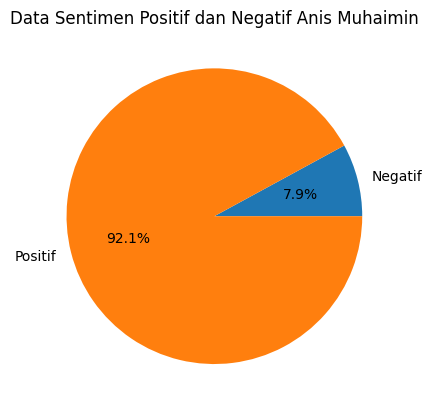

In [175]:
sentimenno = [np.count_nonzero(dataset['sentimen'] == 'negatif'), np.count_nonzero(dataset['sentimen'] == 'positif')]
label = ['Negatif','Positif']
plt.title('Data Sentimen Positif dan Negatif Anis Muhaimin')
plt.pie(sentimenno, labels=label,radius=1, startangle=0, autopct='%.1f%%', shadow=False)
plt.show